<a href="https://colab.research.google.com/github/atlas-github/Sandbox/blob/master/Text_Mining_with_R_Chapter_4_Relationships_between_words_n_grams_and_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: [Text Mining with R Chapter 4 Relationships between words: n-grams and correlations](https://www.tidytextmining.com/ngrams.html)

In [1]:
library(dplyr)
library(tidytext)
library(janeaustenr)

austen_bigrams <- austen_books() %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2)

austen_bigrams


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



book,bigram
<fct>,<chr>
Sense & Sensibility,sense and
Sense & Sensibility,and sensibility
Sense & Sensibility,sensibility by
Sense & Sensibility,by jane
Sense & Sensibility,jane austen
Sense & Sensibility,austen 1811
Sense & Sensibility,1811 chapter
Sense & Sensibility,chapter 1
Sense & Sensibility,1 the


In [2]:
austen_bigrams %>%
  count(bigram, sort = TRUE)

bigram,n
<chr>,<int>
of the,3017
to be,2787
in the,2368
it was,1781
i am,1545
she had,1472
of her,1445
to the,1387
she was,1377


In [3]:
library(tidyr)

bigrams_separated <- austen_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)

# new bigram counts:
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)

bigram_counts

word1,word2,n
<chr>,<chr>,<int>
sir,thomas,287
miss,crawford,215
captain,wentworth,170
miss,woodhouse,162
frank,churchill,132
lady,russell,118
lady,bertram,114
sir,walter,113
miss,fairfax,109


In [4]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")

bigrams_united

book,bigram
<fct>,<chr>
Sense & Sensibility,jane austen
Sense & Sensibility,austen 1811
Sense & Sensibility,1811 chapter
Sense & Sensibility,chapter 1
Sense & Sensibility,norland park
Sense & Sensibility,surrounding acquaintance
Sense & Sensibility,late owner
Sense & Sensibility,advanced age
Sense & Sensibility,constant companion


In [5]:
austen_books() %>%
  unnest_tokens(trigram, text, token = "ngrams", n = 3) %>%
  separate(trigram, c("word1", "word2", "word3"), sep = " ") %>%
  filter(!word1 %in% stop_words$word,
         !word2 %in% stop_words$word,
         !word3 %in% stop_words$word) %>%
  count(word1, word2, word3, sort = TRUE)

word1,word2,word3,n
<chr>,<chr>,<chr>,<int>
dear,miss,woodhouse,23
miss,de,bourgh,18
lady,catherine,de,14
catherine,de,bourgh,13
poor,miss,taylor,11
sir,walter,elliot,11
ten,thousand,pounds,11
dear,sir,thomas,10
twenty,thousand,pounds,8


In [6]:
bigrams_filtered %>%
  filter(word2 == "street") %>%
  count(book, word1, sort = TRUE)

book,word1,n
<fct>,<chr>,<int>
Sense & Sensibility,berkeley,16
Sense & Sensibility,harley,16
Northanger Abbey,pulteney,14
Northanger Abbey,milsom,11
Mansfield Park,wimpole,10
Pride & Prejudice,gracechurch,9
Sense & Sensibility,conduit,6
Sense & Sensibility,bond,5
Persuasion,milsom,5


In [7]:
bigram_tf_idf <- bigrams_united %>%
  count(book, bigram) %>%
  bind_tf_idf(bigram, book, n) %>%
  arrange(desc(tf_idf))

bigram_tf_idf

book,bigram,n,tf,idf,tf_idf
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Persuasion,captain wentworth,170,0.029855989,1.791759,0.053494751
Mansfield Park,sir thomas,287,0.028731605,1.791759,0.051480125
Mansfield Park,miss crawford,215,0.021523676,1.791759,0.038565250
Persuasion,lady russell,118,0.020723569,1.791759,0.037131650
Persuasion,sir walter,113,0.019845451,1.791759,0.035558275
Emma,miss woodhouse,162,0.017009660,1.791759,0.030477219
Northanger Abbey,miss tilney,82,0.015944002,1.791759,0.028567816
Sense & Sensibility,colonel brandon,108,0.015020862,1.791759,0.026913772
Emma,frank churchill,132,0.013859723,1.791759,0.024833290


In [8]:
bigrams_separated %>%
  filter(word1 == "not") %>%
  count(word1, word2, sort = TRUE)

word1,word2,n
<chr>,<chr>,<int>
not,be,610
not,to,355
not,have,327
not,know,252
not,a,189
not,think,176
not,been,160
not,the,147
not,at,129


In [9]:
AFINN <- get_sentiments("afinn")

AFINN

ERROR: ignored

In [10]:
not_words <- bigrams_separated %>%
  filter(word1 == "not") %>%
  inner_join(AFINN, by = c(word2 = "word")) %>%
  count(word2, value, sort = TRUE)

not_words

ERROR: ignored

In [11]:
library(ggplot2)

not_words %>%
  mutate(contribution = n * value) %>%
  arrange(desc(abs(contribution))) %>%
  head(20) %>%
  mutate(word2 = reorder(word2, contribution)) %>%
  ggplot(aes(word2, n * value, fill = n * value > 0)) +
  geom_col(show.legend = FALSE) +
  xlab("Words preceded by \"not\"") +
  ylab("Sentiment value * number of occurrences") +
  coord_flip()

ERROR: ignored

In [12]:
negation_words <- c("not", "no", "never", "without")

negated_words <- bigrams_separated %>%
  filter(word1 %in% negation_words) %>%
  inner_join(AFINN, by = c(word2 = "word")) %>%
  count(word1, word2, value, sort = TRUE)

ERROR: ignored

In [14]:
install.packages("igraph")
library(igraph)

# original counts
bigram_counts

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘igraph’

The following object is masked from ‘package:tidyr’:

    crossing

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



word1,word2,n
<chr>,<chr>,<int>
sir,thomas,287
miss,crawford,215
captain,wentworth,170
miss,woodhouse,162
frank,churchill,132
lady,russell,118
lady,bertram,114
sir,walter,113
miss,fairfax,109


In [15]:
bigram_graph <- bigram_counts %>%
  filter(n > 20) %>%
  graph_from_data_frame()

bigram_graph

IGRAPH 2c7fa0e DN-- 91 77 -- 
+ attr: name (v/c), n (e/n)
+ edges from 2c7fa0e (vertex names):
 [1] sir     ->thomas     miss    ->crawford   captain ->wentworth 
 [4] miss    ->woodhouse  frank   ->churchill  lady    ->russell   
 [7] lady    ->bertram    sir     ->walter     miss    ->fairfax   
[10] colonel ->brandon    miss    ->bates      lady    ->catherine 
[13] sir     ->john       jane    ->fairfax    miss    ->tilney    
[16] lady    ->middleton  miss    ->bingley    thousand->pounds    
[19] miss    ->dashwood   miss    ->bennet     john    ->knightley 
[22] miss    ->morland    captain ->benwick    dear    ->miss      
+ ... omitted several edges

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘farver’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘ggforce’, ‘ggrepel’, ‘viridis’



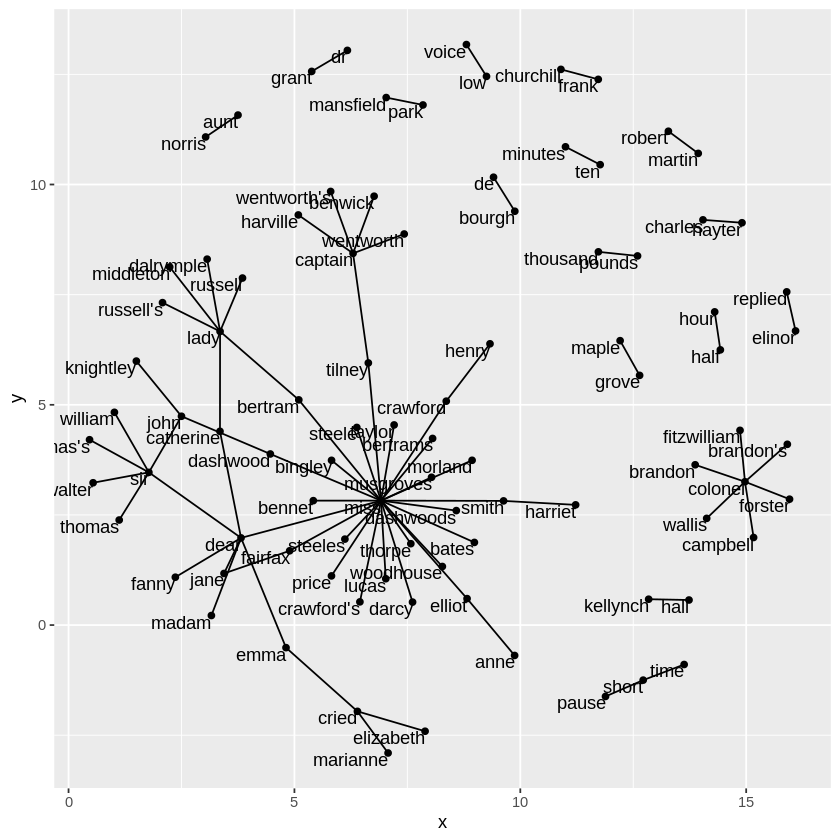

In [21]:
install.packages("ggraph")
library(ggraph)
set.seed(2017)

ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point() +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1)

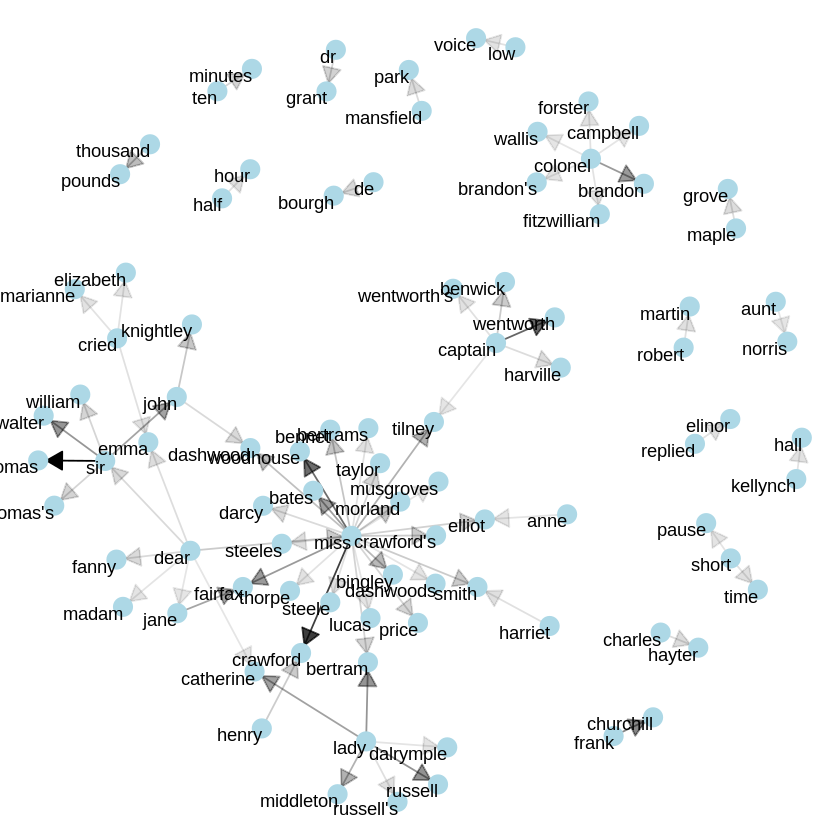

In [22]:
set.seed(2016)

a <- grid::arrow(type = "closed", length = unit(.15, "inches"))

ggraph(bigram_graph, layout = "fr") +
  geom_edge_link(aes(edge_alpha = n), show.legend = FALSE,
                 arrow = a, end_cap = circle(.07, 'inches')) +
  geom_node_point(color = "lightblue", size = 5) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  theme_void()

In [0]:
library(dplyr)
library(tidyr)
library(tidytext)
library(ggplot2)
library(igraph)
library(ggraph)

count_bigrams <- function(dataset) {
  dataset %>%
    unnest_tokens(bigram, text, token = "ngrams", n = 2) %>%
    separate(bigram, c("word1", "word2"), sep = " ") %>%
    filter(!word1 %in% stop_words$word,
           !word2 %in% stop_words$word) %>%
    count(word1, word2, sort = TRUE)
}

visualize_bigrams <- function(bigrams) {
  set.seed(2016)
  a <- grid::arrow(type = "closed", length = unit(.15, "inches"))
  
  bigrams %>%
    graph_from_data_frame() %>%
    ggraph(layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a) +
    geom_node_point(color = "lightblue", size = 5) +
    geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
    theme_void()
}

In [24]:
# the King James version is book 10 on Project Gutenberg:
library(gutenbergr)
kjv <- gutenberg_download(10)

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org


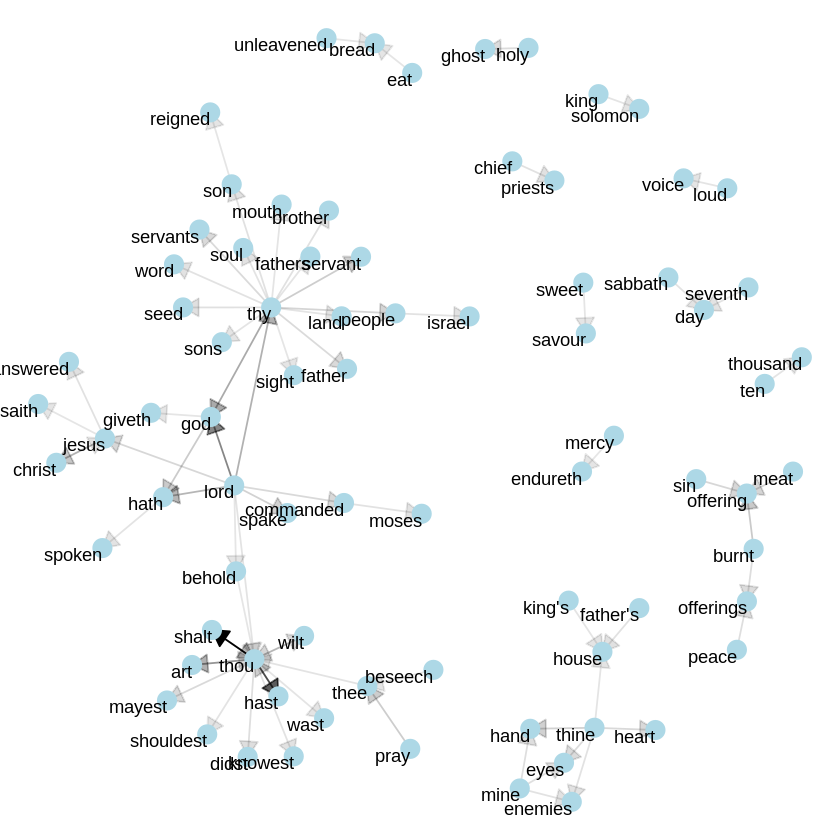

In [25]:
library(stringr)

kjv_bigrams <- kjv %>%
  count_bigrams()

# filter out rare combinations, as well as digits
kjv_bigrams %>%
  filter(n > 40,
         !str_detect(word1, "\\d"),
         !str_detect(word2, "\\d")) %>%
  visualize_bigrams()

In [26]:
austen_section_words <- austen_books() %>%
  filter(book == "Pride & Prejudice") %>%
  mutate(section = row_number() %/% 10) %>%
  filter(section > 0) %>%
  unnest_tokens(word, text) %>%
  filter(!word %in% stop_words$word)

austen_section_words

book,section,word
<fct>,<dbl>,<chr>
Pride & Prejudice,1,truth
Pride & Prejudice,1,universally
Pride & Prejudice,1,acknowledged
Pride & Prejudice,1,single
Pride & Prejudice,1,possession
Pride & Prejudice,1,fortune
Pride & Prejudice,1,wife
Pride & Prejudice,1,feelings
Pride & Prejudice,1,views


In [27]:
library(widyr)

# count words co-occuring within sections
word_pairs <- austen_section_words %>%
  pairwise_count(word, section, sort = TRUE)

word_pairs

ERROR: ignored

In [0]:
word_pairs %>%
  filter(item1 == "darcy")

In [0]:
# we need to filter for at least relatively common words first
word_cors <- austen_section_words %>%
  group_by(word) %>%
  filter(n() >= 20) %>%
  pairwise_cor(word, section, sort = TRUE)

word_cors

In [0]:
word_cors %>%
  filter(item1 == "pounds")

In [0]:
word_cors %>%
  filter(item1 %in% c("elizabeth", "pounds", "married", "pride")) %>%
  group_by(item1) %>%
  top_n(6) %>%
  ungroup() %>%
  mutate(item2 = reorder(item2, correlation)) %>%
  ggplot(aes(item2, correlation)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ item1, scales = "free") +
  coord_flip()

In [0]:
set.seed(2016)

word_cors %>%
  filter(correlation > .15) %>%
  graph_from_data_frame() %>%
  ggraph(layout = "fr") +
  geom_edge_link(aes(edge_alpha = correlation), show.legend = FALSE) +
  geom_node_point(color = "lightblue", size = 5) +
  geom_node_text(aes(label = name), repel = TRUE) +
  theme_void()